In [1]:
import os
#os.environ['OPENBLAS_NUM_THREADS'] = '20'
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy as sp
import matplotlib.pyplot as plt
import random
from matplotlib import rcParams
import seaborn as sns
import multiome.functional_anno as functional_anno

sc.set_figure_params(
    scanpy=True, dpi_save=600, vector_friendly=True, format="pdf",
    facecolor=(1.0, 1.0, 1.0, 0.0), transparent=False
)
rcParams["savefig.bbox"] = "tight"

Here we start from having the cluster marker pairs discovered.  
We will filter the results with significance cutoffs.

### Memory B v.s. Intermediate B

/mnt/atlas_local/chaozhong/home/miniconda3/envs/multiome/lib/python3.10/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


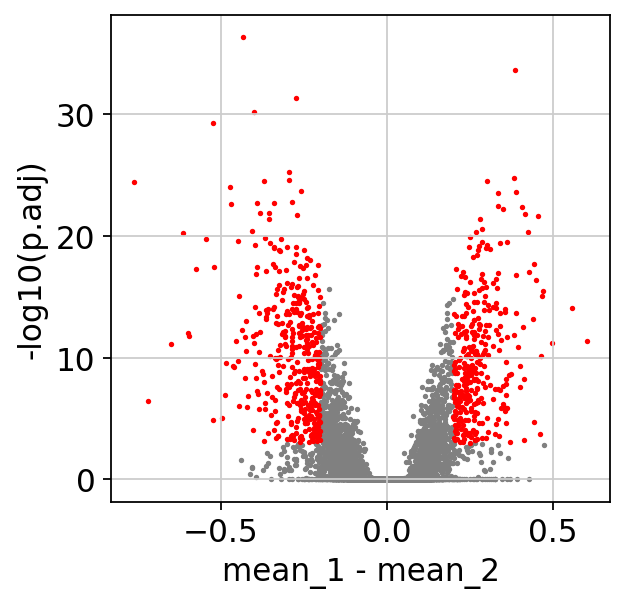

In [2]:
import multiome.marker_discovery as marker_discovery
stat_df = pd.read_csv('10X_B.markers.csv',index_col=0)
#stat_df_memB = stat_df.loc[stat_df['group']=='Intermediate B',:]
stat_df = marker_discovery.MarkerFilter(stat_df,
                                        min_pct_rna=0.1, min_pct_atac=0.05,
                                        mean_diff=0.2, p_cutoff=1e-3,
                                        plot=True)

#### Motif enrichment analysis

The package has functions to call HOMER installed by user to perform motif enrichment analysis with the peaks discovered.

**Homer installation**  

Follow the instructions here: http://homer.ucsd.edu/homer/introduction/install.html to download Homer.  
(Please note: several 3rd party software needed by Homer, so just install the basic of Homer won't complete the whole job)

In [3]:
import multiome.functional_anno as functional_anno
peaks = stat_df['name'].str.split('_').str[1].to_numpy()
print(len(peaks))
homer_df = functional_anno.run_HOMER_motif(peaks, out_dir='homer/',
                                           prefix='Bdev', ref_genome='hg38',
                                           homer_path='/mnt/atlas_local/chaozhong/data/homer/',
                                           split_symbol=['-','-'], size=200)

555
Save peaks list in BED file format at homer/Bdev.peaks.bed
Creat HOMER output folder at homer/homer_Bdev



	Position file = homer/Bdev.peaks.bed
	Genome = hg38
	Output Directory = homer/homer_Bdev
	Fragment size set to 200
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 555
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 555
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.

	Extracting sequences from file: /mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa
	Looking for peak sequences in a single file (/mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa)
	Extracting 53 sequences from chr1
	Extracting 22 sequences from chr10
	Extracting 25 sequences from chr11
	Extracting 30 sequences from chr12
	Extracting 13 sequences

		Reprioritizing potential motifs...
	3 of 25 Initial Sequence: CTTTCACT... (-11.837)
		Round 1: -15.94 CTTTCACT T:47.0(8.13%),B:1700.0(3.40%),P:1e-6
		Round 2: -16.34 GTTTCACT T:61.0(10.42%),B:2408.4(4.78%),P:1e-7
		Round 3: -20.63 GTTTSAYT T:120.0(19.46%),B:5592.5(10.76%),P:1e-8
		Round 4: -20.63 GTTTSAYT T:120.0(19.46%),B:5592.5(10.76%),P:1e-8
		=Final=: -20.96 GTTTSAYT T:115.0(20.72%),B:5731.2(11.67%),P:1e-9
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	4 of 25 Initial Sequence: CCCTTTTT... (-10.450)
		Round 1: -20.98 CCCTTTTT T:183.0(28.11%),B:9529.7(17.63%),P:1e-9
		Round 2: -20.98 CCCTTTTT T:183.0(28.11%),B:9529.7(17.63%),P:1e-9
		=Final=: -16.70 CCCTTTTT T:125.0(22.52%),B:6910.2(14.07%),P:1e-7
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	5 of 25 Initial Sequence: AGAGCGGA... (-10.007)
		Round 1: -14.76 AGAGCGGA T:266.0(38.10%),B:16286.9(28.22%),P:1e-6
		Round 2: -15.93 AGAGCGGA T:387.0(50.24%),B:24421.5(39

		=Final=: -16.22 NGAGCKGCTC T:61.0(10.99%),B:2603.0(5.30%),P:1e-7
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	10 of 25 Initial Sequence: TCTGATGTTA... (-10.408)
		Round 1: -21.78 TCTGATGTTA T:62.0(10.58%),B:2108.4(4.20%),P:1e-9
		Round 2: -21.78 TCTGATGTTA T:62.0(10.58%),B:2108.4(4.20%),P:1e-9
		=Final=: -23.04 TCTGATGTTA T:59.0(10.63%),B:2049.8(4.17%),P:1e-10
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	11 of 25 Initial Sequence: GGGCGAGTCA... (-10.264)
		Round 1: -20.99 GGGCGAGTCA T:14.0(2.49%),B:112.0(0.23%),P:1e-9
		Round 2: -20.99 GGGCGAGTCA T:14.0(2.49%),B:112.0(0.23%),P:1e-9
		=Final=: -23.33 GGGCGAGTCA T:14.0(2.52%),B:112.0(0.23%),P:1e-10
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	12 of 25 Initial Sequence: ATGACTCAGT... (-10.174)
		Round 1: -10.17 ATGACTCAGT T:5.0(0.90%),B:17.5(0.03%),P:1e-4
		Round 2: -10.17 ATGACTCAGT T:5.0(0.90%),B:17.5(0.03%),P:1e-4
		=Final=:

		Round 3: -17.35 CAGTCAGAGCAG T:11.0(1.96%),B:78.6(0.16%),P:1e-7
		Round 4: -17.35 CAGTCAGAGCAG T:11.0(1.96%),B:78.6(0.16%),P:1e-7
		=Final=: -19.84 CAGTCAGAGCAG T:10.0(1.80%),B:59.3(0.12%),P:1e-8
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	4 of 25 Initial Sequence: GCCGGCCCCGTC... (-15.255)
		Round 1: -29.36 GCCGGCCCCGTC T:7.0(1.25%),B:3.2(0.01%),P:1e-12
		Round 2: -33.51 GTCGACCCCGTC T:7.0(1.25%),B:1.2(0.00%),P:1e-14
		Round 3: -33.51 GTCGACCCCGTC T:7.0(1.25%),B:1.2(0.00%),P:1e-14
		=Final=: -15.25 GTCGACCCCGTC T:3.0(0.54%),B:1.2(0.00%),P:1e-6
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	5 of 25 Initial Sequence: TATGATATATAT... (-15.255)
		Round 1: -15.25 TATGATATATAT T:4.0(0.72%),B:2.0(0.00%),P:1e-6
		Round 2: -15.25 TATGATATATAT T:4.0(0.72%),B:2.0(0.00%),P:1e-6
		=Final=: -9.67 TATGATATATAT T:2.0(0.36%),B:2.0(0.00%),P:1e-4
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	6 

		=Final=: -17.56 CSCGAACCCCSC T:5.0(0.90%),B:7.9(0.02%),P:1e-7
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	24 of 25 Initial Sequence: TAAATGACTCAG... (-9.669)
		Round 1: -17.70 TAAATGACTCAG T:19.0(3.37%),B:303.9(0.61%),P:1e-7
		Round 2: -22.28 KAAATGACTCAG T:27.0(4.75%),B:498.0(1.01%),P:1e-9
		Round 3: -23.16 TAAATGACTCAG T:28.0(4.92%),B:514.1(1.04%),P:1e-10
		Round 4: -24.31 TAAATGACTCAG T:16.0(2.84%),B:125.2(0.25%),P:1e-10
		Round 5: -24.31 TAAATGACTCAG T:16.0(2.84%),B:125.2(0.25%),P:1e-10
		=Final=: -21.81 TAAATGACTCAG T:14.0(2.52%),B:125.2(0.25%),P:1e-9
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	25 of 25 Initial Sequence: TTTCACAATAAG... (-9.669)
		Round 1: -15.43 TTTCACAATAAG T:11.0(1.96%),B:96.3(0.20%),P:1e-6
		Round 2: -19.85 TTTCACAAACAK T:27.0(4.75%),B:560.4(1.13%),P:1e-8
		Round 3: -20.28 TTTCACAAACAG T:15.0(2.67%),B:142.7(0.29%),P:1e-8
		Round 4: -23.05 TTTCACAAACAG T:16.0(2.84%),B:137.4(0.28%),P:1

sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlo

sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlo

HOMER finished successfully! Please check the HTML report for interesting motifs.
motif_summary can be run with the motif index for further analysis.


sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
	Formatting HTML page...
		1 of 33 (1e-15) similar to PRDM1(Zf)/Hela-PRDM1-ChIP-Seq(GSE31477)/Homer(0.802)
		2 of 33 (1e-14) similar to PB0118.1_Esrra_2/Jaspar(0.695)
		3 of 33 (1e-12) similar to ETS:RUNX(ETS,Runt)/Jurkat-RUNX1-ChIP-Seq(GSE17954)/Homer(0.646)
		4 of 33 (1e-12) similar to PB0137.1_Irf3_2/Jaspar(0.659)
		5 of 33 (1e-11) similar to MA0056.1_MZF1_1-4/Jaspar(0.593)
		6 of 33 (1e-11) similar to MA0143.3_Sox2/Jaspar(0.677)
		7 of 33 (1e-11)

Next, please refer to the **knownResults.html** generated by Homer to check any motif of interested.  
Give the **motif index** to **motif_summary( )** function in functional_anno to extract the peaks related to it.

In [3]:
motif_peaks = functional_anno.motif_summary(peak_file='homer/Bdev.peaks.bed',
                                            homer_dir='homer/homer_Bdev/',
                                            motif_index=9, ref_genome='hg38',
                                            homer_path='/mnt/atlas_local/chaozhong/data/homer/')


	Position file = homer/Bdev.peaks.bed
	Genome = hg38
	Output Directory = homer/homer_Bdev/
	Will find motif(s) in homer/homer_Bdev/knownResults/known9.motif
	Fragment size set to 200
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 555
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 555
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.

	Extracting sequences from file: /mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa
	Looking for peak sequences in a single file (/mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa)
	Extracting 53 sequences from chr1
	Extracting 22 sequences from chr10
	Extracting 25 sequences from

HOMER finished successfully! Motif related peaks will be loaded and returned.



	Cleaning up tmp files...



In [4]:
stat_df['peaks'] = stat_df['name'].str.split('_').str[1]
stat_df['genes'] = stat_df['name'].str.split('_').str[0]

gp_df = stat_df.loc[stat_df['peaks'].isin(motif_peaks['peaks']),['genes','peaks']].copy()
gp_df.index = gp_df['peaks']
gp_df['genes'].to_csv('Spi1_genes.txt',index=False, header=False)